[Novice to Grandmaster 커널](https://www.kaggle.com/ash316/novice-to-grandmaster)을 Fork해서 작성한 내용입니다.

# 데이터 과학자 설문조사
캐글은 세계에서 가장 큰 데이터 과학 플랫폼으로 백만명이상의 사용자가 있습니다.  이 노트북에서는 데이터 과학자를 대상으로 캐글에서 진행한 설문조사를 시각화 하는 방법을 알아 봅니다.  

## 데이터의 특징

- 171개 국가 및 지역에서 16,716명의 응답자
- 평균 응답 시간은 16.4 분
- 모든 질문이 모든 응답자에게 보이는 것은 아님
- 학생과 실무자를 구분해 설문을 진행

In [1]:
#  필요한 라이브러리를 불러옵니다.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings # Suppress Deprecation and Incorrect Usage Warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기

In [2]:
question = pd.read_csv('../input/schema.csv')
response=pd.read_csv('../input/multipleChoiceResponses.csv',encoding='ISO-8859-1')
# question.shape
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [3]:
response.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,Employed by a company that doesn't perform adv...,Jupyter notebooks,Bayesian Methods,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Kaggle,Non-Kaggle online communities,Online co...",NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,Somewhat useful,NaN,Somewhat useful,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,Less than 10% of projects,More internal than external,IT Department,NaN,NaN,"Key-value store (e.g. Redis/Riak),Row-oriented...","Email,Share Drive/SharePoint",NaN,Git,Rarely,NaN,IDR,I do not want to share information about my sa...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,Employed by professional services/consulting firm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## 기초적인 분석
기본적인 분석을 수행해서 살펴보도록 하겠습니다.

In [4]:
print('전체 응답자의 수: ',response.shape[0])
print('전체 국가의 수: ',response['Country'].nunique())
print('가장 많이 응답한 국가: ',response['Country'].value_counts().index[0],'with',response['Country'].value_counts().values[0],'respondents')
print('가장 어린 응답자의 나이: ',response['Age'].min(),' 가장 나이 많은 응답자의 나이 : ',response['Age'].max())

전체 응답자의 수:  16716
전체 국가의 수:  52
가장 많이 응답한 국가:  United States with 4197 respondents
가장 어린 응답자의 나이:  0.0  가장 나이 많은 응답자의 나이 :  100.0


설문조사의 문제는 가짜 응답과 무응답이라고 볼 수 있는데요, 위의 결과를 보시면 0살과 100살은 분명한 가짜 응답으로 볼 수 있습니다.

### 무응답 시각화하기
전체 데이터에서 무응답한 데이터를 시각화해서 보겠습니다.

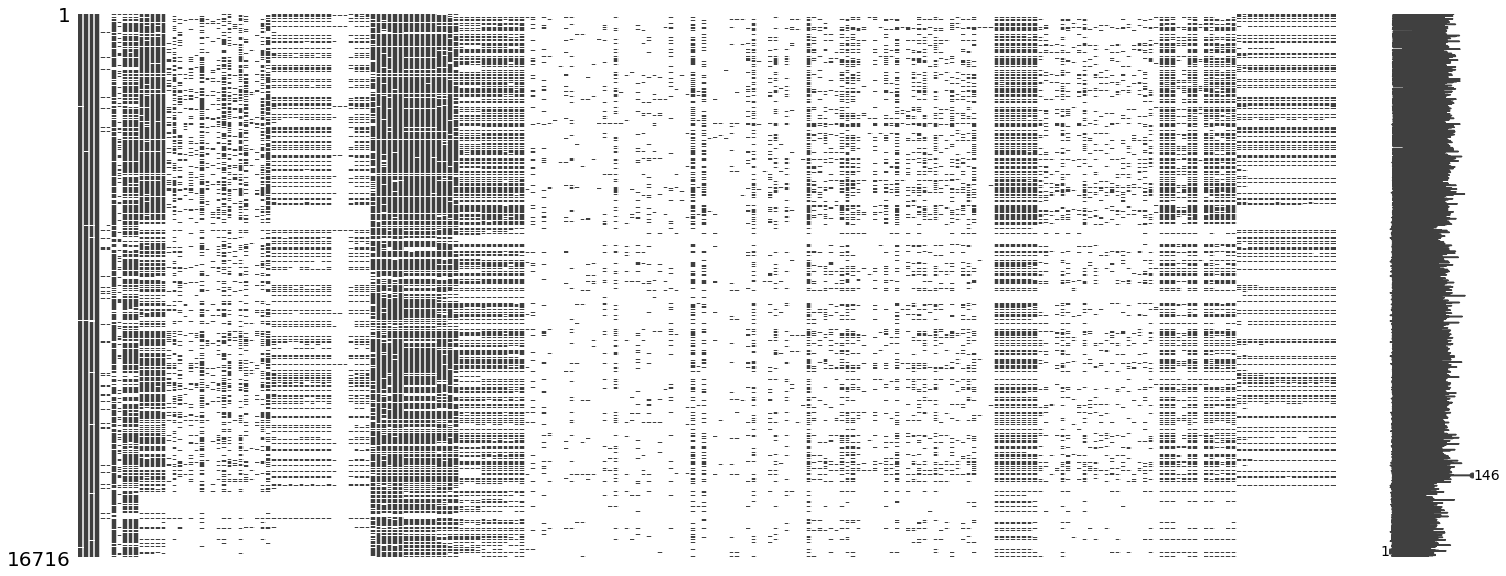

In [5]:
import missingno as msno # https://github.com/ResidentMario/missingno
msno.matrix(response)

총 16,716명의 데이터와 총 290개의 질문에 무응답을 시각화해보니 무응답 데이터의 컬럼이 많은 것을 확인 할 수 있습니다.

## 성별로 나누기

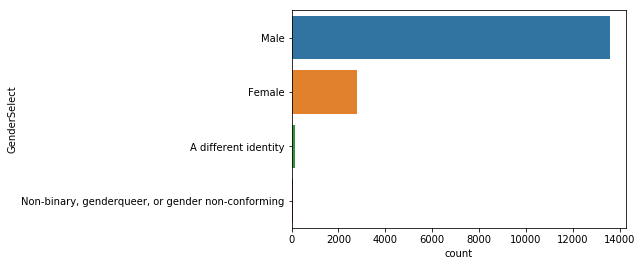

In [6]:
plt.subplots()
sns.countplot(y=response['GenderSelect'],order=response['GenderSelect'].value_counts().index)
plt.show()

여성보다는 남성이 압도적으로 많은 것을 확인 할 수 있습니다.

## 국가별 응답률

Text(0.5,0,'')

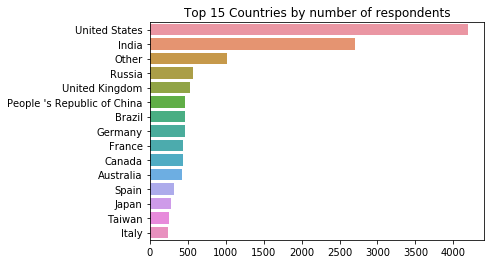

In [7]:
resp_coun=response['Country'].value_counts()[:15].to_frame() # 응답률로 정렬하고 상위 15개만 분리합니다.
sns.barplot(resp_coun['Country'],resp_coun.index)
plt.title('Top 15 Countries by number of respondents')
plt.xlabel('') # x레이블을 지웁니다.

**미국** 과 **인도**에서 거의 3분의 1정도의 응답자가 나왔습니다. 역시 IT 강국으로 유명한 나라들이죠.  그렇다면 한국인의 응답자수는 몇명일까요? 

In [8]:
korean = response[response['Country']=='South Korea'] # 국적이 한국인 데이터만
print('한국인 응답자 수:  ' + str(korean.shape[0]))


한국인 응답자 수:  194


정말 적은 숫자로 194명 뿐이네요.

## 나이별 응답률
응답한 사람들의 나이의 분포를 시각화해보겠습니다.

32.3926106870229


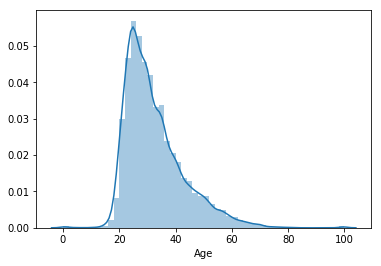

In [9]:
sns.distplot(response['Age'].dropna()) # 무응답 데이터 제거
print(response[response['Age'] > 0]['Age'].mean()) # 평균 나이

응답자의 대부분이 20대에서 30대 사이에 있습니다. 가장 많은 나이대는 30대입니다. 그리고 평균나이는 32세입니다. 한국인은 어떨까요?

32.20942408376963


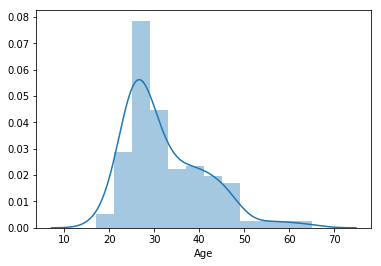

In [10]:
sns.distplot(korean['Age'].dropna())
print(korean[korean['Age'] > 0]['Age'].mean()) # 평균 나이

한국도 다른 나라와 비슷한 나이대 인 것을 알 수 있네요.

## 전공에 대한 정보
데이터 과학자들의 전공을 정리해 데이터 프레임을 만들어 보겠습니다.

In [11]:
major_df = pd.DataFrame(response['MajorSelect'].value_counts())# value_counts 를 사용하면 그룹화된 데이터의 카운트 값을 보여준다.
major_df['ratio'] = pd.DataFrame(response['MajorSelect'].value_counts(normalize=True)) # 해당 데이터가 전체 데이터에서 어느 정도의 비율을 차지하는지 알 수 있다.
major_df.head(10) # 상위 10개의 전공

,MajorSelect,ratio
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


역시나 컴퓨터 과학 전공이 33%로 가장 많고 수학, 공학, 전기 공학 순으로 있습니다. 저와 같이 생물학을 전공한 사람도 2%정도나 되는군요. 위의 데이터를 시각화하면 다음과 같습니다.

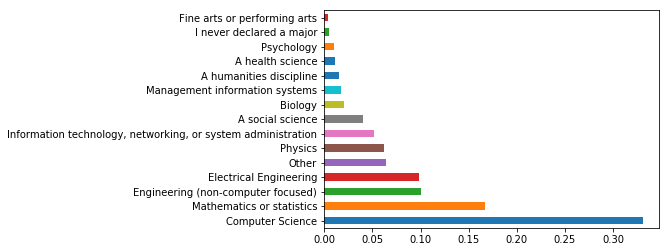

In [12]:
major_df['ratio'].plot(kind='barh') #pandas를 이용한 간단한 시각화

## 프로그래밍 경험
경험이 얼마나 되는지에 대한 정보는 **Tenure** 열로 저장이 되어 있습니다. 

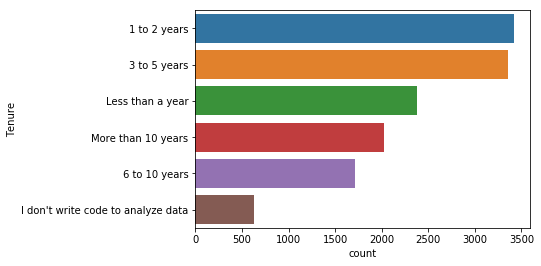

In [13]:
sns.countplot(y='Tenure', data=response, order=response['Tenure'].value_counts().index)

데이터 과학자들은 대부분이 1 - 5년의 경험을 가지고 있는 것 보입니다.  그만큼 새로운 영역이라고 볼 수 있겠죠.

## 연봉 데이터 보정하기
미국에서 데이터 과학자는 연봉이 높기로 유명한 직업중 하나입니다. 어디 한번 설문조사 결과를 볼 까요?

In [14]:
response['CompensationAmount']=response['CompensationAmount'].str.replace(',','')
response['CompensationAmount']=response['CompensationAmount'].str.replace('-','')
rates=pd.read_csv('../input/conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)
salary=response[['CompensationAmount','CompensationCurrency','GenderSelect','Country','CurrentJobTitleSelect']].dropna()
salary=salary.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
salary['Salary']=pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']
print('최고 연봉($)',salary['Salary'].dropna().astype(int).max())
print('최적 연봉($)',salary['Salary'].dropna().astype(int).min())
print('중위 연봉($)',salary['Salary'].dropna().astype(int).median())

최고 연봉($) 28297400000
최적 연봉($) 0
중위 연봉($) 53812.0


역시 최고와 최저값은 말도 안되는 값입니다. 중위 연봉값은 어느 정도 믿을 수 있겠네요.  시각화를 통해 연봉 분포를 볼까요?

Text(0.5,1,'Salary Distribution')

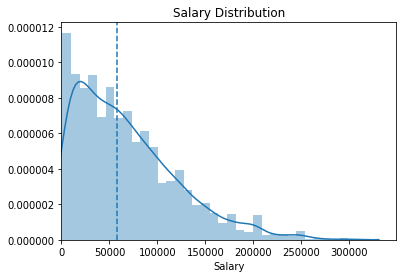

In [15]:
plt.subplots()
salary=salary[(salary['Salary']<300000) & (salary['Salary']>1000) ] # 현실적인 연봉 값만 선택
sns.distplot(salary['Salary']).set(xlim=(0, None))
plt.axvline(salary['Salary'].median(), linestyle='dashed') # 중위값 
plt.title('Salary Distribution')

연봉의 분포는 역시 53000$ 아래에 많고 연봉이 높은 사람은 급격하게 줄어드는 모습을 볼 수 있습니다. 
## 국가별 연봉의 차이
국가별로는 데이터과학자의 연봉이 어떤 차이가 있는지 알아보겠습니다. 중위 연봉이 높은 상위 15개의 국가를 시각화합니다.

Text(0.5,1,'Highest Salary Paying Countries')

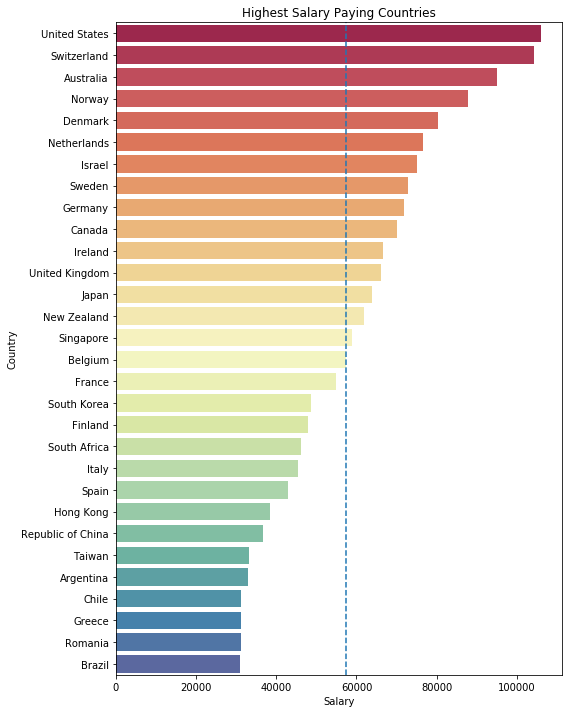

In [16]:
plt.subplots(figsize=(8,12))
sal_coun = salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:30].to_frame()
sns.barplot('Salary', sal_coun.index, data = sal_coun, palette='Spectral')
plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Highest Salary Paying Countries')

역시 미국의 데이터과학자가 가장 많은 중위연봉을 받고 있습니다. 여기서 놀라운 것은 **인도**는 두번째로 가장 많은 응답률이 높았던 나라이지만 연봉순위에서는 없다는 것입니다. 
 

 ## 무엇을 배워야 할까요?

Text(0.5,1,'ML Tool Next Year')

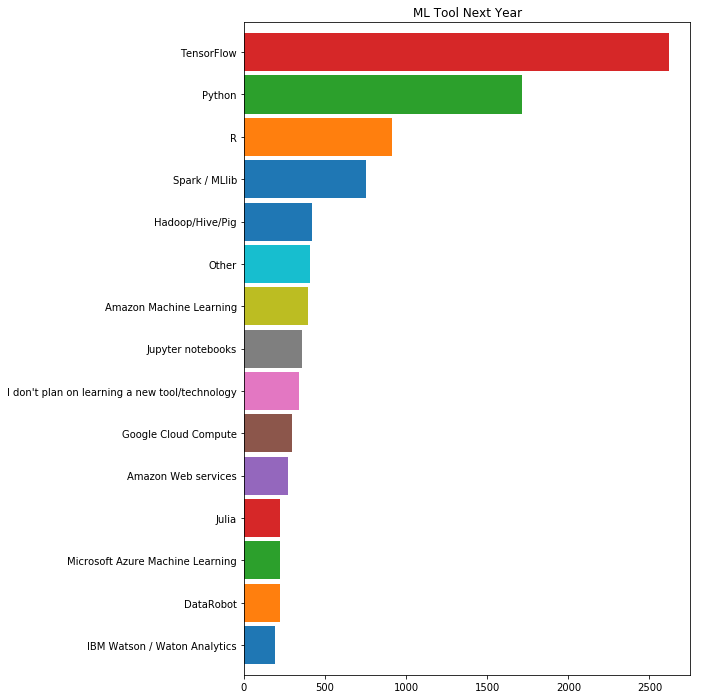

In [17]:
f,ax=plt.subplots(figsize=(8,12))
tool=response['MLToolNextYearSelect'].str.split(',')
tool_nxt=[]
for i in tool.dropna():
    tool_nxt.extend(i)
pd.Series(tool_nxt).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9)
ax.set_title('ML Tool Next Year')

앞으로도 파이썬 프레임워크인 텐서플로우가 23%로 가장 많은 관심을 받을 것이라 생각하고 있군요.  그리고 그 뒤로는 `Python`과 `R`이 있습니다. 

 ## 어디에서 데이터 사이언스를 배워야 할까요?

Text(0.5,1,'Best Platforms to Learn')

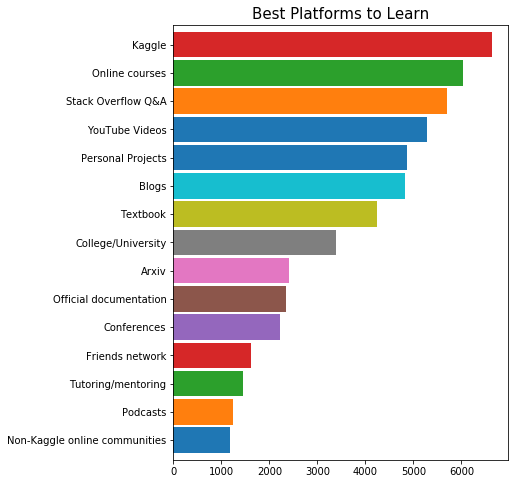

In [18]:
plt.subplots(figsize=(6,8))
learn=response['LearningPlatformSelect'].str.split(',')
platform=[]
for i in learn.dropna():
    platform.extend(i)
pd.Series(platform).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9)
plt.title('Best Platforms to Learn',size=15)

역시 캐글이 가장 상위를 차지하고 있습니다. 전통적인 교과서는 다른 온라인 코스라던지 유투브에 밀리는 모습을 보이고 있습니다. 

## 데이터 분석에서의 가장 큰 문제점은?

Text(0.5,0,'')

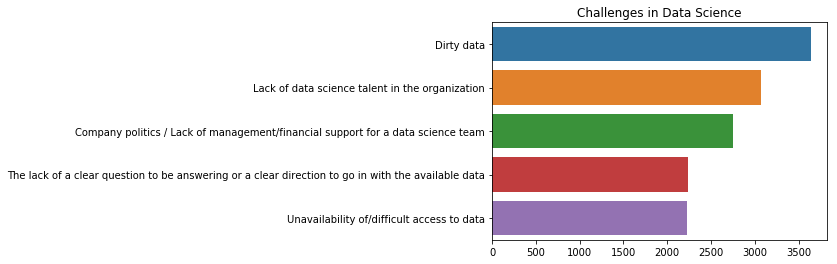

In [19]:
plt.subplots()
challenge=response['WorkChallengesSelect'].str.split(',')
challenges=[]
for i in challenge.dropna():
    challenges.extend(i)
plt1=pd.Series(challenges).value_counts().sort_values(ascending=False).to_frame()[:5] # 상위 5개만
sns.barplot(plt1[0],plt1.index)
plt.title('Challenges in Data Science')
plt.xlabel('') # x레이블을 지웁니다.

데이터 분석에서의 가장 큰 문제점은 역시 **데이터의 질**입니다. 데이터 전처리에 가장 많은 시간이 들기 때문이죠. 매우 성가시기도 하구요.  
## 직업을 찾는데 가장 고려해야 할 요소는 무엇인가요?


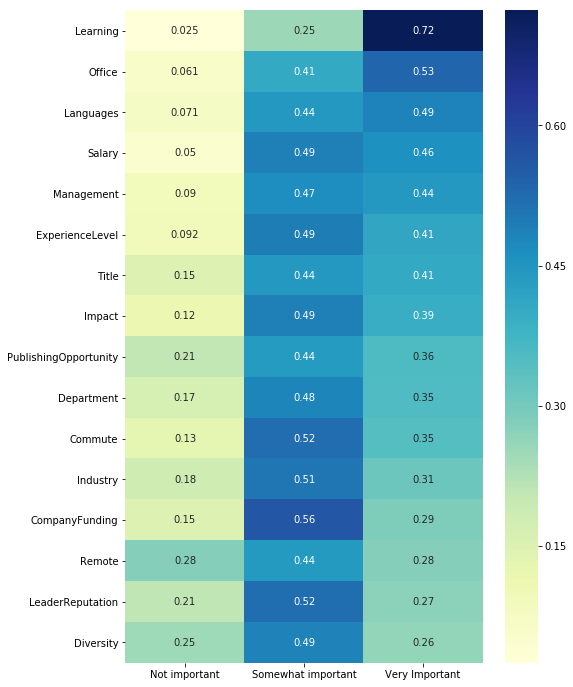

In [20]:
qc = question.loc[question[ 'Column'].str.contains('JobFactor')]
job_factors = [ x for x in response.columns if x.find('JobFactor') != -1]
jfdf = {}
for feature in job_factors:
    a = response[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a
jfdf = pd.DataFrame(jfdf).transpose()
plt.figure(figsize=(8,12))
sns.heatmap(jfdf.sort_values('Very Important', ascending=False), annot=True, cmap="YlGnBu")

데이터 과학자가  직업을 찾을 때 가장 고려해야 할 요소는 배울 점이 있는 곳으로 나오네요.  급여의 중요성이 생각보다 낮은것은 의외라고 보여집니다.
## 마치며
이제까지 데이터 과학자들의 설문조사 결과를 시각화하고 간략히 살펴보았습니다. 데이터 과학자에 흥미가 있으시다면 [캐글(https://www.kaggle.com)에 가입하시길 추천드립니다.